In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hydramuscle.model.smc import SMC
from hydramuscle.model.layer import Layer

## Slow wave

In [4]:
numx = 30
numy = 60
T = 50
dt = 0.0002
save_interval=5000

In [5]:
# Construct muscle sheet

smc = SMC(T=T, dt=dt, k_ipr=0.2, s0=100, k_deg=0.01)
layer = Layer(smc, 
              numx=numx, 
              numy=numy, 
              gip3x=0.1, 
              gip3y=2.0, 
              gcx=1000, 
              gcy=1000,
              save_interval=save_interval)

layer.set_stim_pattern(pathway='slow',
                       xmin=14, xmax=16, ymin=29, ymax=31,
                       stim_times=[0])

sol = layer.run(save_all=True)

100%|██████████| 250000/250000 [01:26<00:00, 2875.72it/s]


In [7]:
# Extract longitudinal
calcium = sol[:, :numx * numy].reshape(-1, numx, numy)
ip = sol[:, 3 * numx * numy : 4 * numx * numy].reshape(-1, numx, numy)

calcium_lon = calcium[:, numx // 2, :]
ip_lon = ip[:, numx // 2, :]

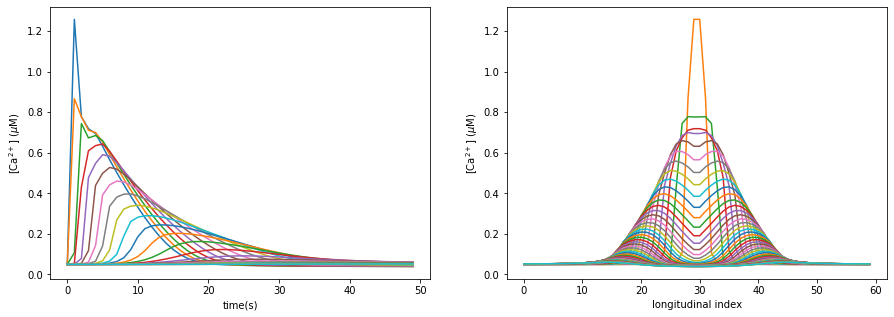

In [9]:
# Plot 

fig = plt.figure(figsize=(15,5))
# Calcium waves
ax11 = fig.add_subplot(121)
ax11.plot(calcium_lon[:, numy // 2:])
ax11.set_xlabel('time(s)')
ax11.set_ylabel(r'[Ca$^{2+}$] ($\mu$M)')
# Calcium wavefronts
ax12 = fig.add_subplot(122)
ax12.plot(calcium_lon.T)
ax12.set_xlabel('longitudinal index')
ax12.set_ylabel(r'[Ca$^{2+}$] ($\mu$M)')
plt.savefig('../../results/figures/slow_curves_ca_2x2.pdf', bbox_inches='tight')
plt.show()

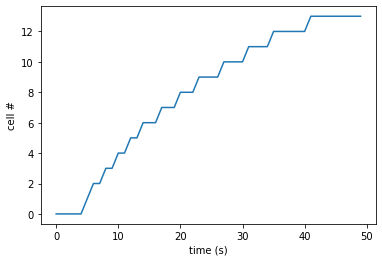

In [27]:
maxpos = np.argmax(calcium_lon.T[31:], axis=0)
plt.figure()
plt.plot(maxpos)
plt.xlabel('time (s)')
plt.ylabel('cell #')
plt.show()

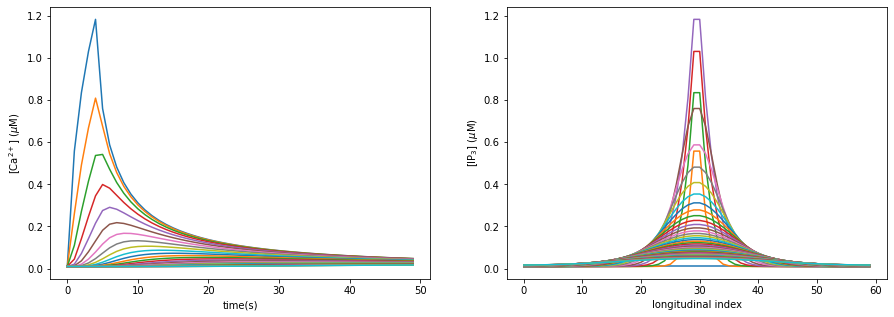

In [22]:
fig = plt.figure(figsize=(15,5))
# Calcium waves
ax11 = fig.add_subplot(121)
ax11.plot(ip_lon[:, numy // 2:])
ax11.set_xlabel('time(s)')
ax11.set_ylabel(r'[Ca$^{2+}$] ($\mu$M)')
# Calcium wavefronts
ax12 = fig.add_subplot(122)
ax12.plot(ip_lon.T)
ax12.set_xlabel('longitudinal index')
ax12.set_ylabel(r'[IP$_3$] ($\mu$M)')
plt.savefig('../results/figures/slow_curves_ip_2x2.pdf', bbox_inches='tight')
plt.show()

## Fast wave

In [23]:
numx = 30
numy = 60
T = 0.2
dt = 0.0002
save_interval=5

In [24]:
# Construct muscle sheet

smc = SMC(T=T, dt=dt, k_ipr=0.2, s0=100, k_deg=0.01)
layer = Layer(smc, 
              numx=numx, 
              numy=numy, 
              gip3x=0.1, 
              gip3y=2.0, 
              gcx=1000, 
              gcy=1000,
              save_interval=save_interval)

layer.set_stim_pattern(pathway='fast',
                       xmin=14, xmax=16, ymin=29, ymax=31,
                       stim_times=[0])

sol = layer.run(save_all=True)

100%|██████████| 1000/1000 [00:00<00:00, 1894.83it/s]


In [25]:
calcium = sol[:, :numx * numy].reshape(-1, numx, numy)
v = sol[:, 4 * numx * numy : 5 * numx * numy].reshape(-1, numx, numy)

In [26]:
# Extract longitudinal
calcium_lon = calcium[:, numx // 2, :]
v_lon = v[:, numx // 2, :]

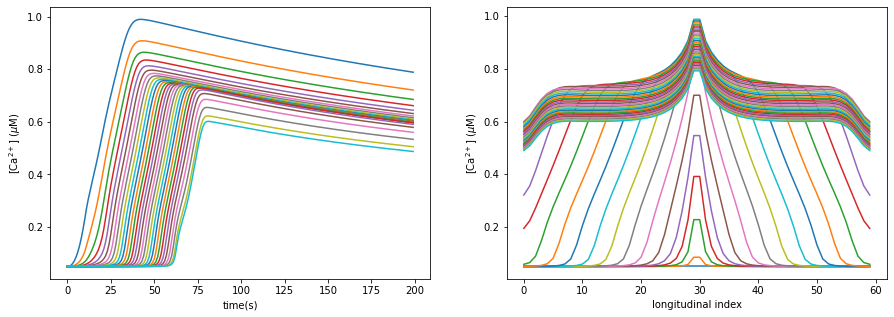

In [31]:
# Plot 

fig = plt.figure(figsize=(15,5))
# Calcium waves
ax11 = fig.add_subplot(121)
ax11.plot(calcium_lon[:, numy // 2:])
ax11.set_xlabel('time(s)')
ax11.set_ylabel(r'[Ca$^{2+}$] ($\mu$M)')
# Calcium wavefronts
ax12 = fig.add_subplot(122)
ax12.plot(calcium_lon[::5].T)
ax12.set_xlabel('longitudinal index')
ax12.set_ylabel(r'[Ca$^{2+}$] ($\mu$M)')
plt.savefig('../results/figures/fast_curves_ca_2x2.pdf', bbox_inches='tight')
plt.show()

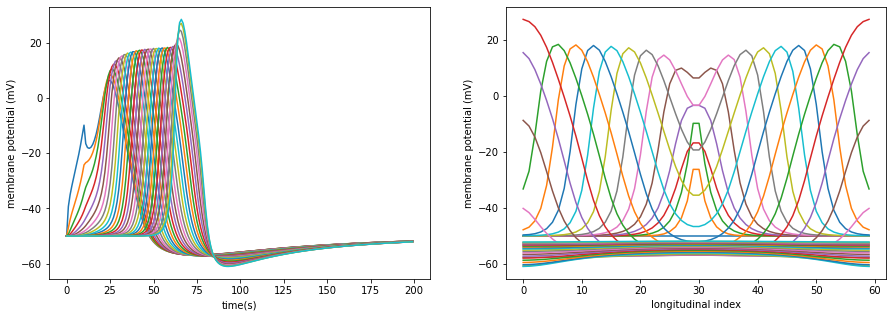

In [30]:
# Plot 

fig = plt.figure(figsize=(15,5))
# Calcium waves
ax11 = fig.add_subplot(121)
ax11.plot(v_lon[:, numy // 2:])
ax11.set_xlabel('time(s)')
ax11.set_ylabel('membrane potential (mV)')
# Calcium wavefronts
ax12 = fig.add_subplot(122)
ax12.plot(v_lon[::5].T)
ax12.set_xlabel('longitudinal index')
ax12.set_ylabel('membrane potential (mV)')
plt.savefig('../results/figures/fast_curves_v_2x2.pdf', bbox_inches='tight')
plt.show()